In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
from sbi.inference import SNPE
from sbi.utils.support_posterior import PosteriorSupport
from sbi.utils import BoxUniform, posterior_nn
from sbi.analysis import pairplot

import torch
from torch import ones, zeros, as_tensor, eye, tensor, float32
from torch.distributions import MultivariateNormal

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
prior = BoxUniform(-ones(1), ones(1))

In [4]:
def simulator(theta):
    return theta + torch.randn(theta.shape) * 0.2

In [56]:
num_rounds = 50
record_rounds = [0, 1, 4, 9, 49]
k_values = [1, 2, 8, 64]

In [57]:
all_recorded_posterior_log_probs = []
for sir_oversample in k_values:
    estimator = posterior_nn("mdn", num_components=1)
    inference = SNPE(prior, density_estimator=estimator, show_progress_bars=False)
    proposal = prior
    max_num_epochs=200
    recorded_posterior_log_probs = []

    for r in range(num_rounds):
        inference._theta_roundwise = []
        inference._x_roundwise = []
        inference._prior_masks = []
        if r % 10 == 0:
            print("\nRound", r)
        theta = proposal.sample((500,))
        x = simulator(theta)
        _ = inference.append_simulations(theta, x).train(force_first_round_loss=True, max_num_epochs=max_num_epochs)
        posterior = inference.build_posterior().set_default_x(zeros(1, 1))
        if sir_oversample > 1:
            proposal = PosteriorSupport(prior, posterior, num_samples_to_estimate_support=100_000, allowed_false_negatives=0.0001, sampling_method="sir", sir_oversample=sir_oversample)
        else:
            proposal = posterior

        if r in record_rounds:
            posterior_log_probs = posterior.log_prob(torch.linspace(-1, 1, 100).unsqueeze(1))
            recorded_posterior_log_probs.append(posterior_log_probs)
        
    all_recorded_posterior_log_probs.append(recorded_posterior_log_probs)


Round 0


/home/michael/anaconda3/envs/tsnpe/lib/python3.8/site-packages/torch/nn/init.py:403: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


 Neural network successfully converged after 44 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 27 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 47 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 37 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 43 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 77 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 37 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 22 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 37 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 27 epochs.
Round 10


Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 23 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 71 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 40 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 34 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 51 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 27 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 34 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 22 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 28 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 25 epochs.
Round 20


Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 32 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 24 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 26 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 27 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 61 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 30 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 48 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 28 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 32 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 34 epochs.
Round 30


Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 23 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 46 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 24 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 41 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 28 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 26 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 27 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 32 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 46 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 22 epochs.
Round 40


Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 22 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 42 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 39 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 49 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 22 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 36 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 44 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 42 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 42 epochs.

Drawing 500 posterior samples:   0%|          | 0/500 [00:00<?, ?it/s]

 Neural network successfully converged after 23 epochs.
Round 0
 Neural network successfully converged after 97 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 22 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 23 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 25 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 24 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 48 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 42 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 25 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]


Round 10


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 25 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 51 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 56 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 22 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 43 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 29 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 37 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]


Round 20


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 24 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 29 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 26 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 40 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 31 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 29 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 38 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 26 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]


Round 30


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 66 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 37 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 92 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 34 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 29 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 22 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 60 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 29 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]


Round 40


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 27 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 23 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 80 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 50 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 146 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 34 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 69 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 59 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 22 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]


Round 0
 Neural network successfully converged after 106 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 37 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 67 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 23 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 66 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 94 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 30 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 35 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 25 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]


Round 10


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 27 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 24 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 45 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 29 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 23 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 58 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 49 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 100 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]


Round 20


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 23 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 45 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 38 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 36 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 38 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 96 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 23 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]


Round 30


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 33 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 71 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 40 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 22 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 24 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 26 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 22 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 86 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 54 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]


Round 40


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 34 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 31 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 48 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 110 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 23 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 30 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

 Neural network successfully converged after 25 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]


Round 0
 Neural network successfully converged after 33 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 31 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 27 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 29 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 23 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 48 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 47 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 102 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 37 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 26 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]


Round 10


Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 22 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 106 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 22 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 43 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 23 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 47 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 93 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 25 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 45 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 36 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]


Round 20


Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 24 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 22 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 22 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 33 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 22 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 22 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 81 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]


Round 30


Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 23 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 28 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 24 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 54 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 36 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 73 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 30 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 31 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 26 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 25 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]


Round 40


Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 41 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 61 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 22 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 46 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 55 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 21 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 22 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

Drawing 10048 posterior samples:   0%|          | 0/10048 [00:00<?, ?it/s]

 Neural network successfully converged after 61 epochs.

Drawing 100000 posterior samples:   0%|          | 0/100000 [00:00<?, ?it/s]

In [58]:
gt_posterior = torch.distributions.Normal(0, 0.2)
gt_probs = torch.exp(gt_posterior.log_prob(torch.linspace(-1, 1, 100)))

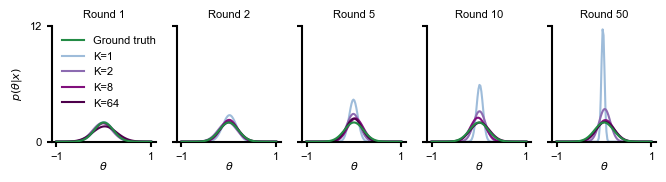

In [81]:
x_vals = torch.linspace(-1, 1, 100)
k_colors = ["#9ebcda", "#8c6bb1", "#810f7c", "#4d004b"]

with mpl.rc_context(fname="../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 5, figsize=(7.8, 1.5))
    for ii in range(5):
        ax[ii].plot(x_vals.numpy(), gt_probs.numpy(), c="#238b45", zorder=1000)
        ax[ii].set_xlabel(r"$\theta$", labelpad=-1)
        ax[ii].set_xticks([-1, 1])
    for k in range(4):
        for ii in range(5):
            ax[ii].plot(x_vals.numpy(), all_recorded_posterior_log_probs[k][ii].exp().numpy(), c=k_colors[k])
            ax[ii].set_ylim([0, 12.0])
            ax[ii].set_yticks([0, 12.0])
            ax[ii].set_title(f"Round {record_rounds[ii]+1}")
            
    for ii in range(1, 5):
        ax[ii].set_yticklabels([])
    ax[0].legend(["Ground truth", "K=1", "K=2", "K=8", "K=64"], loc="upper left")
    ax[0].set_ylabel(r"$p(\theta | x)$")
    plt.savefig("../svg/panel_sir_divergence.svg")

In [82]:
import time
import IPython.display as IPd

def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

In [83]:
from svgutils.compose import *

svg_scale = 1.25

f = Figure("15.7cm", "3.9cm",
    Panel(
          SVG("../svg/panel_sir_divergence.svg").scale(svg_scale).move(0, 0),
    ).move(-5, -5),
)

f.save("../fig/fig4_appendix_sir_divergence.svg")
svg('../fig/fig4_appendix_sir_divergence.svg')

# Sequential Monte Carlo

In [157]:
def smc(prior, posterior, kernel, num_samples, thr, oversample):
    posterior_samples = posterior.sample((num_samples*oversample,))
    posterior_log_probs = posterior.log_prob(posterior_samples)
    prior_log_probs = prior.log_prob(posterior_samples)
    truncated_prior_log_probs = prior_log_probs
    truncated_prior_log_probs[posterior_log_probs < thr] = -float("inf")
    ratio = - posterior_log_probs
    reshaped_ratio = torch.reshape(ratio, (num_samples, oversample))
    
    cat_dist = torch.distributions.Categorical(logits=reshaped_ratio)
    categorical_samples = cat_dist.sample((1,))[0, :]
    reshaped_posterior_samples = torch.reshape(
        posterior_samples, (num_samples, oversample, -1)
    )
    selected_posterior_samples = reshaped_posterior_samples[
        torch.arange(num_samples), categorical_samples
    ]
    
    num_resample_steps = 1
    for n in range(num_resample_steps):
        pertubation = torch.randn(selected_posterior_samples.shape) * 0.1
        selected_posterior_samples = selected_posterior_samples + perturbation
        
        prior_log_probs = prior.log_prob(selected_posterior_samples)
        posterior_log_probs = posterior.log_prob(selected_posterior_samples)
        truncated_prior_log_probs = prior_log_probs
        truncated_prior_log_probs[posterior_log_probs < thr] = -float("inf")
    
    return selected_posterior_samples

In [171]:
posterior = torch.distributions.MultivariateNormal(zeros(1), 0.01*eye(1))
prior = BoxUniform(-ones(1), ones(1))
thr = torch.min(posterior.log_prob(posterior.sample((100,))))

In [172]:
samples = smc(prior, posterior, None, 1000, thr, 1024)

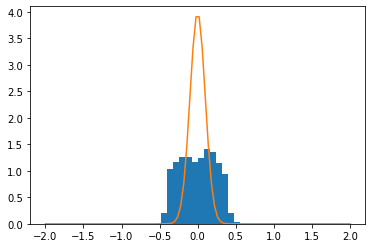

In [173]:
posterior_log_probs = posterior.log_prob(torch.linspace(-2, 2, 100).unsqueeze(1)).exp()
_ = plt.hist(samples.numpy(), bins=50, range=(-2, 2), density=True)
plt.plot(torch.linspace(-2, 2, 100).numpy(), posterior_log_probs.numpy())